# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**30/01/2023**

## Aplicar un caso de uso (*Clasificación*)

In [161]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [162]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [163]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [164]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [165]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [166]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

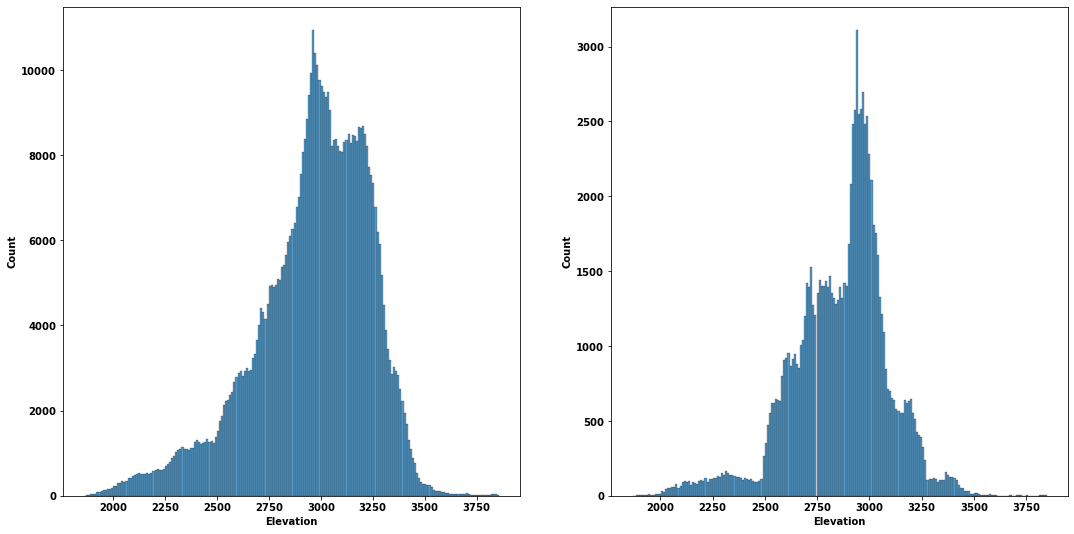

In [167]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que la variable analizada no tiene la misma representación en el subconjunto de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [168]:
100/6

16.666666666666668

In [169]:
df_cub = dataset_cub.sample(frac=1/5.81012, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [170]:
# Consultamos las principales esdadísticas de la variable analizada anteriormente
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

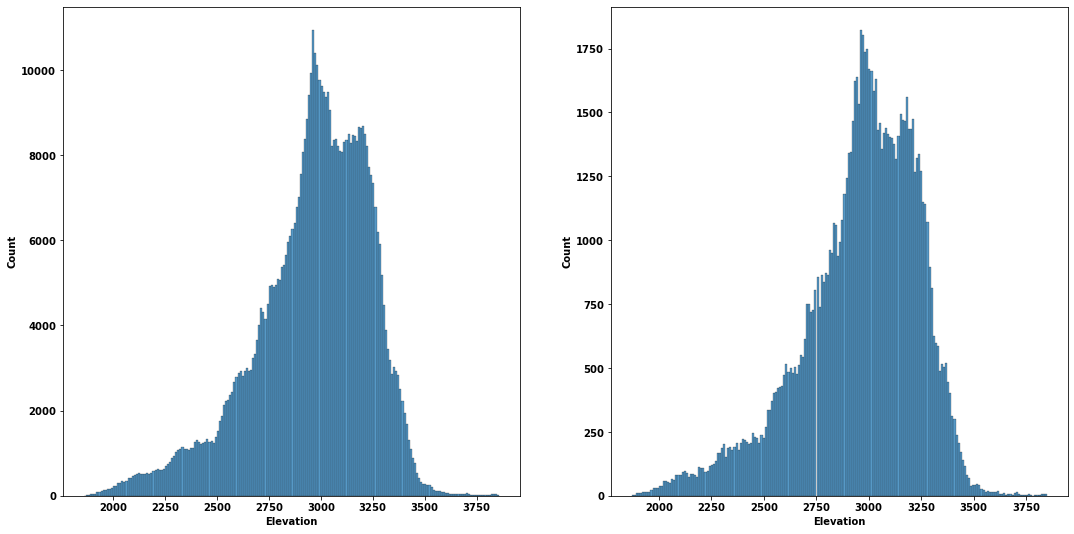

In [171]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

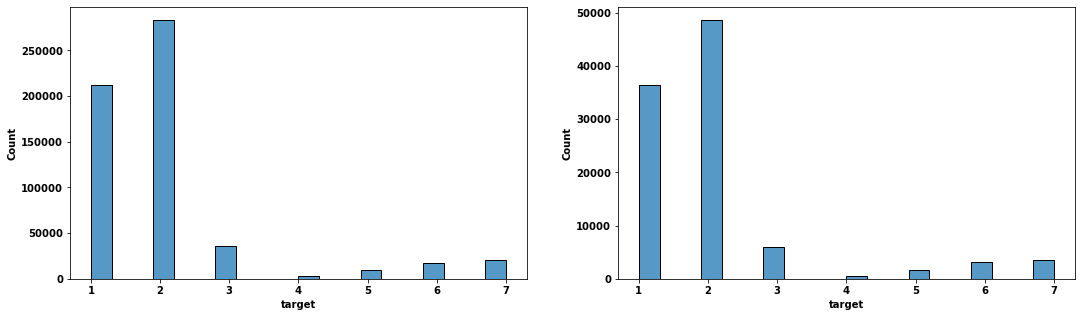

In [172]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [173]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [174]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [175]:
# Conteo de valores perdidos/faltantes
df_cub.isna().sum().sum()

0

In [176]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


In [177]:
len(df_cub.columns)

55

### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [178]:
#Conocer cuántos elementos hay en cada grupo clasificado
df_cub['target'].value_counts()

2    48630
1    36457
3     6064
7     3608
6     3070
5     1650
4      521
Name: target, dtype: int64

In [25]:

#Dividir los datos en los generales y los elementos de clasificación


from sklearn.datasets import make_classification
# define dataset
y=df_cub['target']
X=df_cub.drop(['target'], axis=1)
#X, y = make_classification(n_samples=1000, n_features=55, n_informative=5, n_redundant=5, random_state=100)
# summarize the dataset
print(X.shape, y.shape)

(100000, 54) (100000,)


Ahora vamos a graficar la o¡importancia de cada una de las columnas para poder decidir cuáles son óptimas para nuestro model

Feature: 0, Score: 0.00358
Feature: 1, Score: -0.00091
Feature: 2, Score: -0.00444
Feature: 3, Score: 0.00097
Feature: 4, Score: -0.00747
Feature: 5, Score: 0.00036
Feature: 6, Score: -0.02090
Feature: 7, Score: -0.01729
Feature: 8, Score: -0.00626
Feature: 9, Score: 0.00021
Feature: 10, Score: 0.00004
Feature: 11, Score: 0.00008
Feature: 12, Score: -0.00012
Feature: 13, Score: -0.00010
Feature: 14, Score: -0.00001
Feature: 15, Score: -0.00002
Feature: 16, Score: -0.00001
Feature: 17, Score: -0.00004
Feature: 18, Score: -0.00000
Feature: 19, Score: -0.00002
Feature: 20, Score: -0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00000
Feature: 23, Score: -0.00010
Feature: 24, Score: -0.00004
Feature: 25, Score: -0.00007
Feature: 26, Score: -0.00005
Feature: 27, Score: -0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: -0.00000
Feature: 30, Score: -0.00001
Feature: 31, Score: -0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00001
Featu

/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


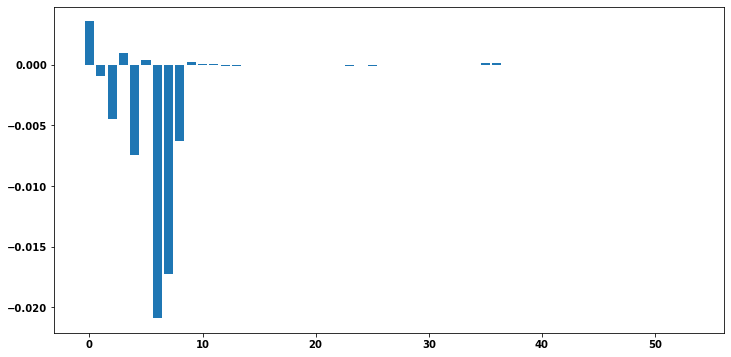

In [26]:
# Hallar la importancia de todas las columnas en base a un modelo de regresión logística (porque es una clasificación)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.34236
0.34236156223627934
Elevation
Feature: 1, Score: 0.03622
0.37857723745448774
Aspect
Feature: 2, Score: 0.01781
0.3963868364857588
Slope
Feature: 3, Score: 0.04261
0.43900093339227153
Horizontal_Distance_To_Hydrology
Feature: 4, Score: 0.04419
0.48319144692079685
Vertical_Distance_To_Hydrology
Feature: 5, Score: 0.11407
0.597263018182871
Horizontal_Distance_To_Roadways
Feature: 6, Score: 0.02996
0.6272181839300874
Hillshade_9am
Feature: 7, Score: 0.03077
0.6579864695163187
Hillshade_Noon
Feature: 8, Score: 0.02375
0.681737199032932
Hillshade_3pm
Feature: 9, Score: 0.12671
0.8084459613963226
Horizontal_Distance_To_Fire_Points
Feature: 10, Score: 0.01388
0.8223222583026232
Wilderness_Area_0
Feature: 11, Score: 0.00681
0.8291359076957164
Wilderness_Area_1
Feature: 12, Score: 0.04443
0.8735641011315094
Wilderness_Area_2
Feature: 13, Score: 0.00162
0.8751824183216681
Wilderness_Area_3
Feature: 14, Score: 0.00059
0.8757691871313592
Soil_Type_0
Feature: 15, Score: 0.

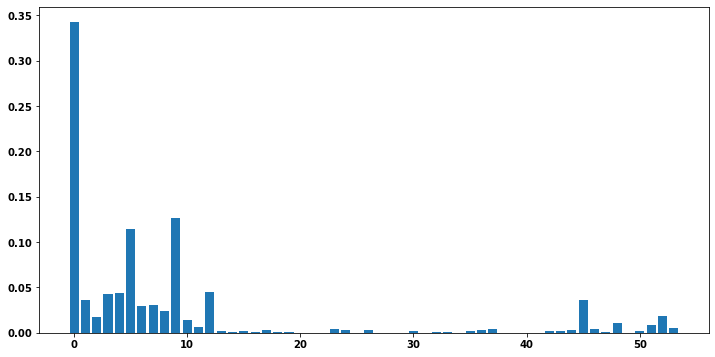

In [32]:
# Cuando ya tenemos la importancia calculada, mediante un arbol de decisión, nos quedamos con las variables más importantes en las tomas de decisiones de cada grupo

#Además, vamos hayando la suma iterativa para ver cuándo se alcanza la importancia del 95% en los datos que tenemos


from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_
suma=0
name_column=X.columns
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
	suma=suma+ v
	print(suma)
	print(name_column[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Para conservar solo las columnas que alcanzan el 95% de los datos imporantes para la clasificación, hay que coger del Feature 0 al 12, el 44, 45, 48, 52, 53

In [179]:
df_reducido=df_cub[['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
        'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2',
        'Soil_Type_30','Soil_Type_31', 'Soil_Type_34','Soil_Type_38', 'Soil_Type_39' , 'target']]

In [180]:
df_reducido.shape

(100000, 19)

---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**.:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**

In [38]:
df_reducido.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_30,Soil_Type_31,Soil_Type_34,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2


In [86]:
df_reducido['Horizontal_Distance_To_Fire_Points']=df_reducido['Horizontal_Distance_To_Fire_Points'].astype(int)

<ipython-input-86-14b11e964d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido['Horizontal_Distance_To_Fire_Points']=df_reducido['Horizontal_Distance_To_Fire_Points'].astype(int)


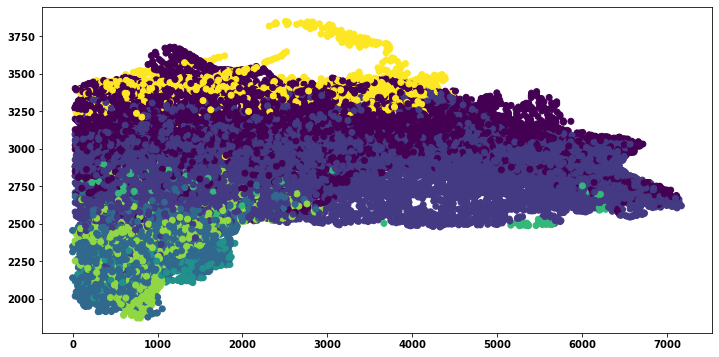

In [87]:
f1 = df_reducido['Horizontal_Distance_To_Fire_Points'].values
f2 = df_reducido['Elevation'].values

colores=['orange','blue', 'pink', 'black', 'yellow', 'purple', 'brown', 'red'] # si no estaban declarados previamente
tamanios=[60,40, 20, 30, 50, 67, 34, 20] # si no estaban declarados previamente

asignar=[]
asignar2=[]
#for index, row in df_reducido.iterrows():
 #   asignar.append(colores[7])
  #  asignar2.append(tamanios[7])

plt.scatter(f1, f2, c=df_reducido['target'])
plt.show()

Como podemos ver de forma clara, los datos no estan repartidos de igual forma en los distintos grupos que se han creado, es por ello que resulta esencial hacer una normalizaión de los datos para que estén repartidos de forma más uniforme en el espacio

In [91]:
import pandas as pd
from sklearn import preprocessing

#Realiamos un procedimeinto para poder escalar variables 

x = df_reducido.drop(['target'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_reducido_escalado = pd.DataFrame(x_scaled, columns=x.columns)

In [94]:
df_reducido_escalado.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_30,Soil_Type_31,Soil_Type_34,Soil_Type_38,Soil_Type_39,target
0,0.728008,0.008333,0.196970,0.396403,0.357143,0.390614,0.795276,0.846457,0.588933,0.309710,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
1,0.282103,0.194444,0.439394,0.068345,0.240741,0.223268,0.933071,0.665354,0.169960,0.054548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
2,0.229019,0.875000,0.212121,0.089209,0.273810,0.054939,0.716535,0.897638,0.731225,0.078125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.550051,0.961111,0.151515,0.064748,0.243386,0.825629,0.787402,0.877953,0.640316,0.555106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.525278,0.172222,0.227273,0.237410,0.345238,0.456091,0.909449,0.818898,0.418972,0.317383,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2


In [93]:
df_reducido_escalado=df_reducido_escalado.join(df_reducido['target'])

In [95]:
df_reducido_escalado['target'].value_counts()

2    48630
1    36457
3     6064
7     3608
6     3070
5     1650
4      521
Name: target, dtype: int64

---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**:  

**`18.3.1`** Divide el datset en _training_ y en _test_:
- Guarda el `20%` de los datos para testeo.
- `random_state=100`  

**`18.3.2`** Entrena un modelo de **regresión logística**:
- Número máximo de iteraciones igual a `1000`
- `random_state=100`

**`18.3.3`** Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- Confusion matrix

In [98]:
from sklearn.model_selection import train_test_split
X=df_reducido_escalado.drop(['target'], axis=1)
y=df_reducido_escalado['target']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size = .8)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#de forma automática, si no se pone nada, toma 100 iteraciones de máximo
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [107]:
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
f1

0.6885163770957157

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=None))

              precision    recall  f1-score   support

           1       0.70      0.70      0.70      7381
           2       0.72      0.80      0.76      9615
           3       0.61      0.70      0.65      1236
           4       0.07      0.02      0.03       114
           5       0.00      0.00      0.00       349
           6       0.38      0.15      0.21       616
           7       0.77      0.41      0.53       689

    accuracy                           0.70     20000
   macro avg       0.47      0.39      0.41     20000
weighted avg       0.68      0.70      0.69     20000



/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [112]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[5158, 2140,    0,    0,    0,    0,   83],
       [1792, 7674,  109,   15,    0,   25,    0],
       [   0,  256,  860,    9,    0,  111,    0],
       [   0,    0,   98,    2,    0,   14,    0],
       [   0,  348,    1,    0,    0,    0,    0],
       [   0,  181,  342,    2,    0,   91,    0],
       [ 404,    5,    0,    0,    0,    0,  280]])

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelo basados en **árboles de decisión**:  

**`18.4.1`** Entrena un modelo tipo **Decision Tree Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.4.2`** Saca la curva de complejidad del modelo _Decision Tree_ (**Model Complexity Curve**) y crea un nuevo clasificador **con el valor óptimo de la profundidad del árbol** según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.
- `random_state=100`
- rango de profundidades:  de `2` a `30` __inclusive__

**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [115]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [116]:
y_pred = model.predict(X_test)

In [117]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))


#Baja de forma considerable con este método

Accuracy of logistic regression classifier on test set: 0.58


In [118]:
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
f1
#Sube de forma moderada

0.8385203388903587

In [119]:
print(classification_report(y_test, y_pred, target_names=None))

              precision    recall  f1-score   support

           1       0.84      0.84      0.84      7381
           2       0.86      0.86      0.86      9615
           3       0.78      0.79      0.79      1236
           4       0.70      0.62      0.66       114
           5       0.60      0.63      0.62       349
           6       0.68      0.66      0.67       616
           7       0.83      0.87      0.85       689

    accuracy                           0.84     20000
   macro avg       0.76      0.75      0.75     20000
weighted avg       0.84      0.84      0.84     20000



In [121]:

#plot del árbol tarda demasiado y  no puedo ejecutarlo (muestra cómo se genera la división de clusters en la clasificación)

import warnings
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


X=df_reducido_escalado.drop(['target'], axis=1)
y=df_reducido_escalado['target']
#splitting the dataset into train and test
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

[Text(384.269840779655, 321.21818181818185, 'X[0] <= 0.595\ngini = 0.624\nsamples = 100000\nvalue = [36457, 48630, 6064, 521, 1650, 3070, 3608]'),
 Text(152.59736868995594, 311.3345454545455, 'X[0] <= 0.323\ngini = 0.554\nsamples = 58681\nvalue = [10195, 37169, 6064, 521, 1650, 3070, 12]'),
 Text(30.804109794739652, 301.45090909090914, 'X[3] <= 0.011\ngini = 0.593\nsamples = 7407\nvalue = [2, 586, 4139, 519, 26, 2135, 0]'),
 Text(4.329325709227409, 291.5672727272728, 'X[0] <= 0.234\ngini = 0.713\nsamples = 582\nvalue = [2, 57, 136, 221, 3, 163, 0]'),
 Text(1.5402635229270725, 281.68363636363637, 'X[6] <= 0.77\ngini = 0.531\nsamples = 314\nvalue = [0, 5, 80, 197, 0, 32, 0]'),
 Text(0.7006868691784947, 271.8, 'X[5] <= 0.125\ngini = 0.56\nsamples = 73\nvalue = [0, 1, 44, 17, 0, 11, 0]'),
 Text(0.358490956323881, 261.91636363636366, 'X[1] <= 0.014\ngini = 0.362\nsamples = 46\nvalue = [0, 1, 36, 2, 0, 7, 0]'),
 Text(0.29331078244681175, 252.0327272727273, 'gini = 0.0\nsamples = 1\nvalue = [

Error in callback <function flush_figures at 0x7f97d29b7550> (for post_execute):


KeyboardInterrupt: 

In [122]:
#Curva de apendizaje, no hace plot porque no termina de ejecutar

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve


X=df_reducido_escalado.drop(['target'], axis=1)
y=df_reducido_escalado['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
#
# Create a pipeline; This will be passed as an estimator to learning curve method
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='lbfgs', random_state=100, max_iter=1000))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

KeyboardInterrupt: 

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **bosques aleatorios**:  

**`18.5.1`** Entrena un modelo tipo **Random Forest Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.5.2`** Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

Feature: 0, Score: 0.34619
Feature: 1, Score: 0.04027
Feature: 2, Score: 0.02391
Feature: 3, Score: 0.05655
Feature: 4, Score: 0.05065
Feature: 5, Score: 0.12023
Feature: 6, Score: 0.03300
Feature: 7, Score: 0.03189
Feature: 8, Score: 0.03205
Feature: 9, Score: 0.12570
Feature: 10, Score: 0.01938
Feature: 11, Score: 0.00902
Feature: 12, Score: 0.04258
Feature: 13, Score: 0.00318
Feature: 14, Score: 0.03510
Feature: 15, Score: 0.00783
Feature: 16, Score: 0.01842
Feature: 17, Score: 0.00404


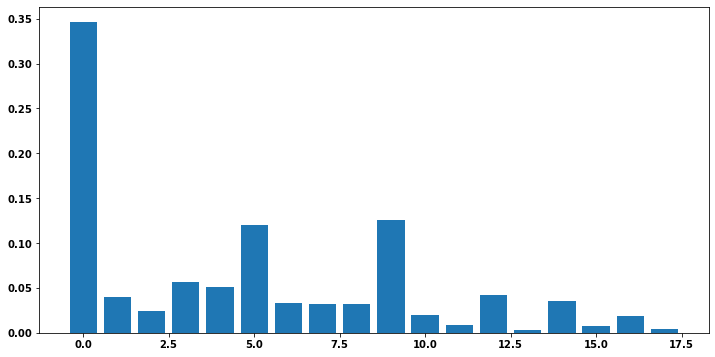

In [186]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

X=df_reducido_escalado.drop(['target'], axis=1)
y=df_reducido_escalado['target']

model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
y_pred = model.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

#Muy buena precisión

Accuracy of logistic regression classifier on test set: 0.97


In [191]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(y_test, y_pred, average="micro"))

/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/

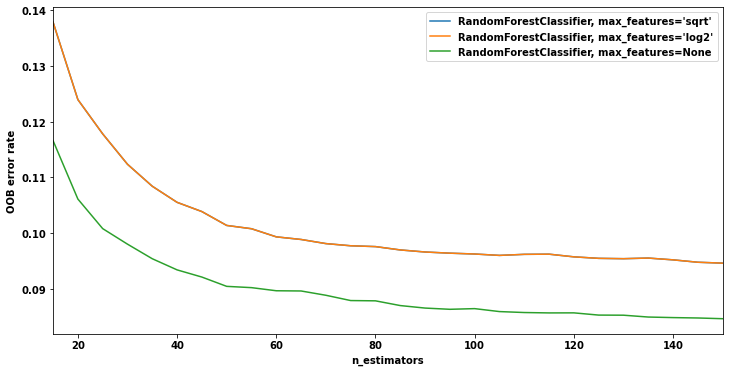

In [189]:

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 100



# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Feature: 0, Score: 0.30539
Feature: 1, Score: 0.04927
Feature: 2, Score: 0.03533
Feature: 3, Score: 0.05871
Feature: 4, Score: 0.05574
Feature: 5, Score: 0.11070
Feature: 6, Score: 0.04214
Feature: 7, Score: 0.04279
Feature: 8, Score: 0.04351
Feature: 9, Score: 0.11026
Feature: 10, Score: 0.02996
Feature: 11, Score: 0.01105
Feature: 12, Score: 0.02441
Feature: 13, Score: 0.00433
Feature: 14, Score: 0.01430
Feature: 15, Score: 0.00955
Feature: 16, Score: 0.03320
Feature: 17, Score: 0.01937


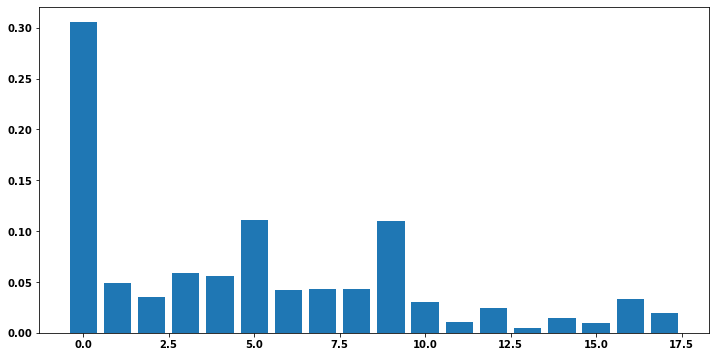

In [184]:
# considera estas opciones para _max_features_ : `["auto", "log2", None]`

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

X=df_reducido_escalado.drop(['target'], axis=1)
y=df_reducido_escalado['target']

model = RandomForestRegressor( max_features='log2')
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [185]:
y_pred = model.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [ ]:
print('F1 is: ', f1_score(y_test, y_pred))

Feature: 0, Score: 0.34652
Feature: 1, Score: 0.04093
Feature: 2, Score: 0.02440
Feature: 3, Score: 0.05539
Feature: 4, Score: 0.05006
Feature: 5, Score: 0.12091
Feature: 6, Score: 0.03203
Feature: 7, Score: 0.03212
Feature: 8, Score: 0.03143
Feature: 9, Score: 0.12740
Feature: 10, Score: 0.01909
Feature: 11, Score: 0.00926
Feature: 12, Score: 0.04155
Feature: 13, Score: 0.00315
Feature: 14, Score: 0.03578
Feature: 15, Score: 0.00801
Feature: 16, Score: 0.01820
Feature: 17, Score: 0.00376


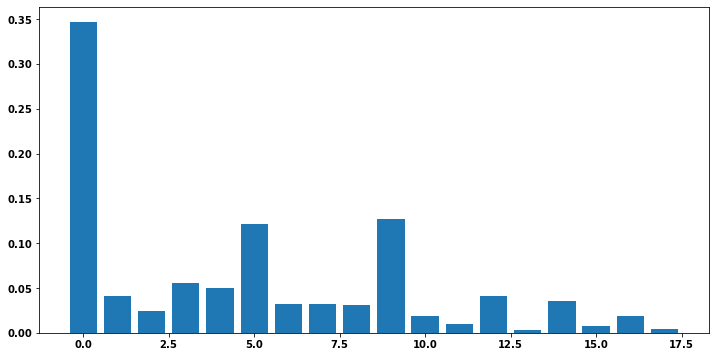

In [182]:
model = RandomForestRegressor( max_features=None)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [183]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [ ]:
print('F1 is: ', f1_score(y_test, y_pred))

La precisión se mantiene contante en los tres casos de max_features

---

### **`Ejercicio 18.6`**

Ahora probamos la creación de otros modelo basados en **Gradient Boosting**:  

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [131]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Feature: 0, Score: 0.07799
Feature: 1, Score: 0.01519
Feature: 2, Score: 0.00819
Feature: 3, Score: 0.01921
Feature: 4, Score: 0.02037
Feature: 5, Score: 0.02768
Feature: 6, Score: 0.01776
Feature: 7, Score: 0.01726
Feature: 8, Score: 0.01901
Feature: 9, Score: 0.02629
Feature: 10, Score: 0.07265
Feature: 11, Score: 0.03620
Feature: 12, Score: 0.14555
Feature: 13, Score: 0.04024
Feature: 14, Score: 0.22524
Feature: 15, Score: 0.12084
Feature: 16, Score: 0.08172
Feature: 17, Score: 0.02861


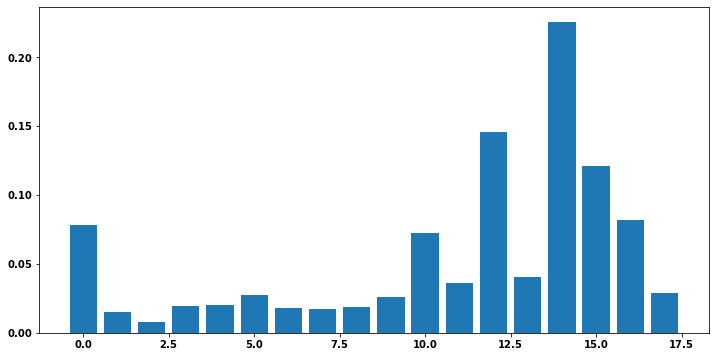

In [192]:
import xgboost


from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot



# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
y_pred = model.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

#Peor precisión que la que veíamos en el ejercicio anterior

Accuracy of logistic regression classifier on test set: 0.76


range(6, 20, 2)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  warnings.warn(


Best: nan using {'max_depth': 6}
nan (nan) with: {'max_depth': 6}
nan (nan) with: {'max_depth': 8}
nan (nan) with: {'max_depth': 10}
nan (nan) with: {'max_depth': 12}
nan (nan) with: {'max_depth': 14}
nan (nan) with: {'max_depth': 16}
nan (nan) with: {'max_depth': 18}


/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Log Loss')

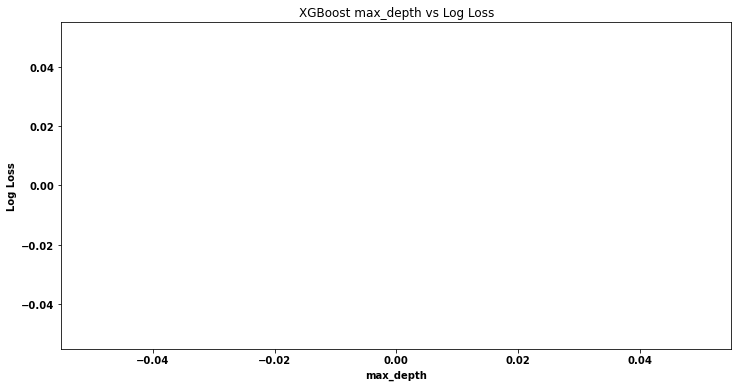

In [195]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib


max_depth = range(6, 20, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

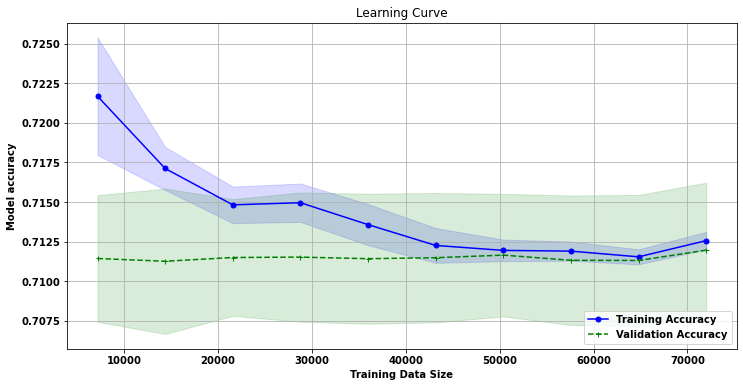

In [196]:
#Curva de apendizaje, no hace plot porque no termina de ejecutar

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve


X=df_reducido_escalado.drop(['target'], axis=1)
y=df_reducido_escalado['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
#
# Create a pipeline; This will be passed as an estimator to learning curve method
#
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='lbfgs', random_state=100, max_iter=1000))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

---

### **`Ejercicio 18.7`**

Ahora probamos la creación de otros modelo basados en **métodos Bayesianos**:  

**`18.7.1`** Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:
- `GaussianNB`
- `MultinomialNB`
- `ComplementNB`
- `BernoulliNB`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [197]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [198]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)


In [199]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.08215
F1 Score: 0.09160320506784381


In [200]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

clf.fit(X_train, y_train)

#clf.predict(y_test)


#Si da error es porque este modelo se emplea para predecir más de dos varibales




MultinomialNB()

In [201]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_train, yticklabels=y_train)
plt.xlabel('true label')
plt.ylabel('predicted label');

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f97d29b7550> (for post_execute):


KeyboardInterrupt: 

In [ ]:

from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))

[3]


In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))


[2]


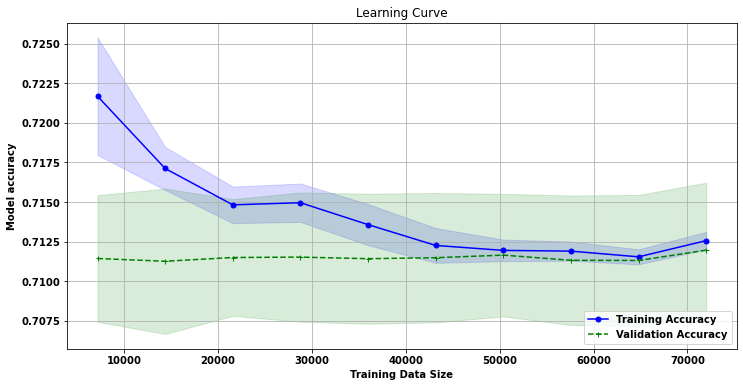

In [202]:
#Curva de apendizaje

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

sizes, training_scores, testing_scores = learning_curve(GaussianNB(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

---

### **`Ejercicio 18.8`**

Ahora probamos la creación de otros modelo basados en **K vecinos más cercanos**:  

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score

In [205]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1=2*(precision*recall)/(precision+recall)
print('F1 Score: ', f1)

Accuracy: 0.87605


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [207]:
#Importing Required Libraries and Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(n_neighbors=1), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
#f1=2*(precision*recall)/(precision+recall)

In [ ]:
#Importing Required Libraries and Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(n_neighbors=100), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

---

### **`Ejercicio 18.9`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales**:  

**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`


**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [206]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=100)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

/Users/mariaperez-serrabona/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [208]:
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

Precisión: 0.78468


In [209]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=100)
clf = MLPClassifier(random_state=100,hidden_layer_sizes=(100,200,100), max_iter=10000, alpha=1e-5, tol=1e-5).fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)


In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
seed=883
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=100)


y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

In [ ]:
#Curva de apendizaje, no hace plot porque no termina de ejecutar

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

sizes, training_scores, testing_scores = learning_curve(Sequential(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Neural network
seed=883
model = Sequential()
model.add(Dense(50, input_dim=20, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
history = model.fit(X_train, y_train, epochs=40, batch_size=100)


y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

In [ ]:
#Curva de apendizaje, no hace plot porque no termina de ejecutar

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

sizes, training_scores, testing_scores = learning_curve(Sequential(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()